In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

In [5]:
midwest = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv', error_bad_lines=False)
midwest.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


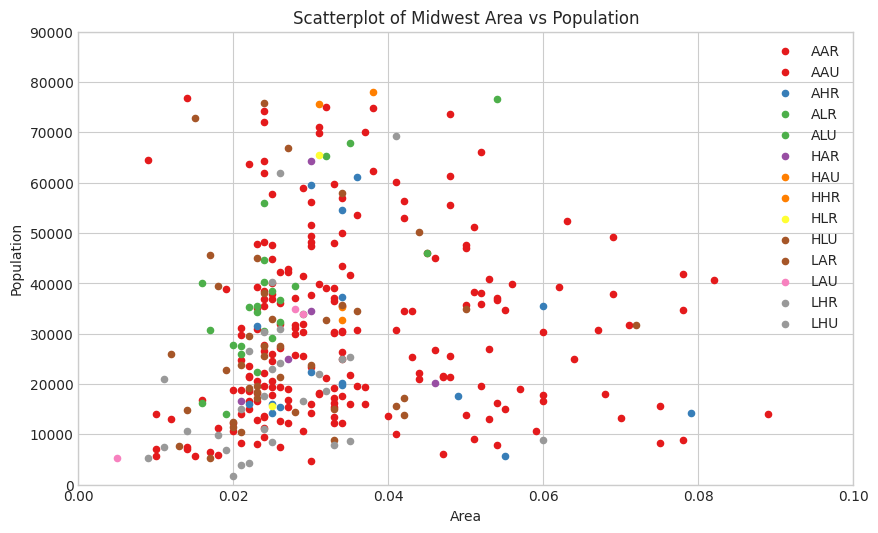

In [6]:
# Scatterplot
# Create as many colors as there are unique midwest['category']
# 
categories = np.unique(midwest['category'])
colors = [plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area','poptotal',data=midwest.loc[midwest.category == category, :],s=20,c=colors[i],
    label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1),ylim=(0, 90000),)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Area', fontdict={'fontsize': 10})
plt.ylabel('Population', fontdict={'fontsize': 10})
plt.title("Scatterplot of Midwest Area vs Population", fontsize=12)
plt.legend(fontsize=10)
plt.show()

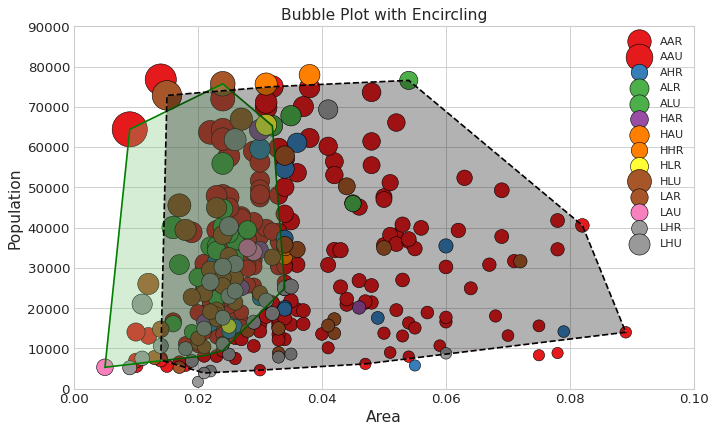

In [7]:
# Bubble Chart with Encircling

from matplotlib import patches
from scipy.spatial import ConvexHull

sns.set_style("whitegrid")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))]

#Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('area','poptotal',
                data=midwest.loc[midwest.category == category, :],
                s='dot_size',c=colors[i],
                label=str(category),
                edgecolors='black',
                linewidths=.5)

# Encircling
def encircle(x, y, ax=None, **kw):  #Circle the check points   
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data1 = midwest.loc[midwest.state == 'IN', :]
encircle(midwest_encircle_data1.area, midwest_encircle_data1.poptotal, ec="pink", fc="#74C476", alpha=0.3)
encircle(midwest_encircle_data1.area, midwest_encircle_data1.poptotal, ec="g", fc="none", linewidth=1.5)

midwest_encircle_data6 = midwest.loc[midwest.state == 'WI', :]
encircle(midwest_encircle_data6.area, midwest_encircle_data6.poptotal, ec="pink", fc="black", alpha=0.3)
encircle(midwest_encircle_data6.area, midwest_encircle_data6.poptotal, ec="black", fc="none", linewidth=1.5, linestyle='--')

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Area', fontdict={'fontsize': 14})
plt.ylabel('Population', fontdict={'fontsize': 14})
plt.title("Bubble Plot with Encircling", fontsize=14)
plt.legend(fontsize=10)
plt.show()

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')
df.head()




,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Figure size 3000x2000 with 0 Axes>

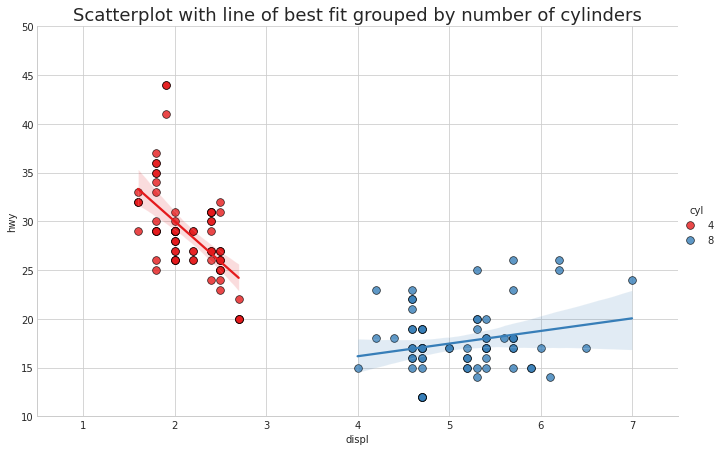

In [9]:
# Scatterplot with regression lines
plt.figure(dpi=500)

df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot

gridobj = sns.lmplot(
    x="displ",
    y="hwy",
    hue="cyl",
    data=df_select,
    height=7,
    aspect=1.6,  #robust=True, 
    palette='Set1',
    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 50))
gridobj.fig.set_size_inches(10, 6)
plt.title("Scatterplot with line of best fit grouped by number of cylinders")
plt.show()

<Figure size 1200x800 with 0 Axes>

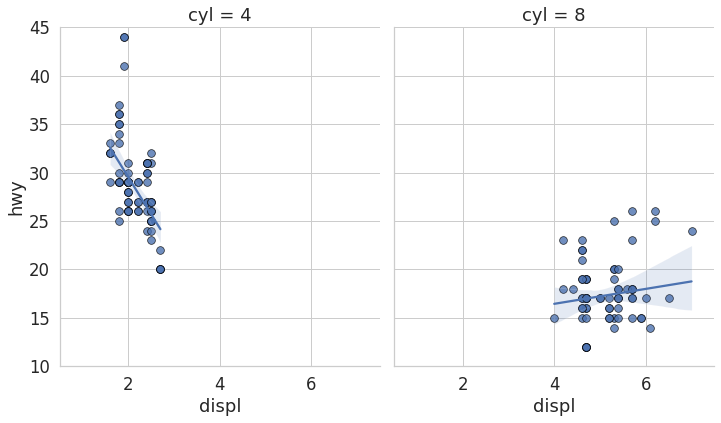

In [10]:
# Scatterplot with facet on column and regression lines

plt.figure(dpi=200)

df_select = df.loc[df.cyl.isin([4, 8]), :]

# Each line in its own column
gridobj = sns.lmplot(x="displ",
                     y="hwy",
                     data=df_select,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 45))
gridobj.fig.set_size_inches(10, 6)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


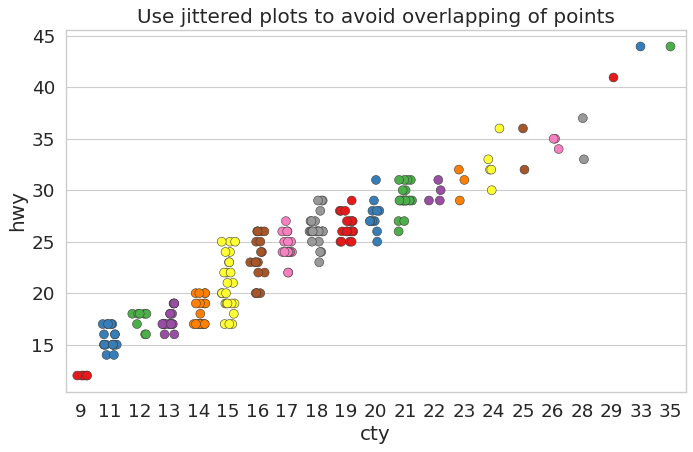

In [12]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(df.cty,
              df.hwy,
              jitter=0.25,
              size=8,
              ax=ax,
              linewidth=.5,
              palette='Set1')

# Decorations
plt.title('Use jittered plots to avoid overlapping of points')
plt.show()